In [1]:
from koopman_probabilistic import *
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm

In [2]:
zone_name = "VT"

In [3]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
# x = np.transpose(np.array([all_data["ISONE CA"]["DEMAND"], all_data["ISONE CA"]["DewPnt"], all_data["ISONE CA"]["DryBulb"]], dtype=np.float64))
# all_zones = []
# all_temps = []
# # ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
# for zone in all_data.keys():
#     all_zones.append(all_data[zone]["DEMAND"])
#     all_temps.append(all_data[zone]["DryBulb"])
# x = np.transpose(np.array(all_zones, dtype=np.float64))
x = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))

In [4]:
x_original = x
mean = np.mean(x, axis=0)
rnge = np.max(x, axis=0) - np.min(x, axis=0)
x = (x - np.matlib.repmat(mean, x.shape[0], 1)) / np.matlib.repmat(rnge, x.shape[0], 1)
print("x", x.shape)

x (96408, 1)


In [5]:
data_name = zone_name

train_through = int(10 * 365.24 * 24 + 0.5)
train_start = 0
delay = 52 * 24  # 1.5 to 2 month gap, then 1 month forecast
x = x[train_start:]
predict_through = train_through + 24 * 31 + delay  
x = x[:predict_through]
xt = x[:train_through, :]

num_freqs = [4, 4, 4]
# num_freqs = [4, 4]
num_fourier = 4
mu_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}mu.npy"
sigma_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}sigma.npy"
alpha_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}alpha.npy"
print("x", x.shape)
print("xt", xt.shape)

96408
89650
x (89650, 1)
xt (87658, 1)


In [6]:
model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=512)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)

In [7]:
k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])

tensor([0.2618, 0.0374, 0.0086, 0.0007])

In [29]:
k.fit(xt, iterations=50, interval=10, verbose=True, cutoff=0, weight_decay=1e-10000, lr_theta=1e-3, lr_omega=1e-10, num_slices=None);

Iteration  0
tensor([  24.0000,  168.0000,  730.4999, 8770.3486,   24.0000,  168.0000,
         730.4999, 8773.0439,   24.0000,  168.0000,  730.4999, 8765.6602])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8770.3486,   24.0000,  168.0000,
         730.4999, 8773.0439,   24.0000,  168.0000,  730.4999, 8765.6602],
       grad_fn=<MulBackward0>)
Loss:  -1.3000282269424368
Iteration  1
tensor([  24.0000,  168.0000,  730.4999, 8770.3486,   24.0000,  168.0000,
         730.4999, 8773.0439,   24.0000,  168.0000,  730.4999, 8765.6602])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8770.3486,   24.0000,  168.0000,
         730.4999, 8773.0439,   24.0000,  168.0000,  730.4999, 8765.6602],
       grad_fn=<MulBackward0>)
Loss:  -1.299798732765912
Iteration  2
tensor([  24.0000,  168.0000,  730.4999, 8770.3486,   24.0000,  168.0000,
         730.4999, 8773.0439,   24.0000,  168.0000,  730.4999, 8765.6602])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 877

Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8773.8535,   24.0000,  168.0000,
         730.4999, 8777.6182,   24.0000,  168.0000,  730.4999, 8765.6562],
       grad_fn=<MulBackward0>)
Loss:  -1.2955637883552882
Iteration  22
tensor([  24.0000,  168.0000,  730.4999, 8773.8535,   24.0000,  168.0000,
         730.4999, 8777.6182,   24.0000,  168.0000,  730.4999, 8765.6562])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8774.4053,   24.0000,  168.0000,
         730.4999, 8778.3438,   24.0000,  168.0000,  730.4999, 8765.6523],
       grad_fn=<MulBackward0>)
Loss:  -1.2957143061065337
Iteration  23
tensor([  24.0000,  168.0000,  730.4999, 8774.4053,   24.0000,  168.0000,
         730.4999, 8778.3438,   24.0000,  168.0000,  730.4999, 8765.6523])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8774.9512,   24.0000,  168.0000,
         730.4999, 8779.0635,   24.0000,  168.0000,  730.4999, 8765.6455],
       grad_fn=<MulBackward0>)
Loss:  -1.2959093029815

Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8784.6914,   24.0000,  168.0000,
         730.4999, 8792.2881,   24.0000,  168.0000,  730.4999, 8765.4121],
       grad_fn=<MulBackward0>)
Loss:  -1.3048242878084477
Iteration  44
tensor([  24.0000,  168.0000,  730.4999, 8784.6914,   24.0000,  168.0000,
         730.4999, 8792.2881,   24.0000,  168.0000,  730.4999, 8765.4121])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8785.1094,   24.0000,  168.0000,
         730.4999, 8792.8496,   24.0000,  168.0000,  730.4999, 8765.3984],
       grad_fn=<MulBackward0>)
Loss:  -1.3053200637502054
Iteration  45
tensor([  24.0000,  168.0000,  730.4999, 8785.1094,   24.0000,  168.0000,
         730.4999, 8792.8496,   24.0000,  168.0000,  730.4999, 8765.3984])
Setting periods to tensor([  24.0000,  168.0000,  730.4999, 8785.5234,   24.0000,  168.0000,
         730.4999, 8793.4004,   24.0000,  168.0000,  730.4999, 8765.3818],
       grad_fn=<MulBackward0>)
Loss:  -1.3058152961498

In [27]:
params = k.predict(predict_through)
mu_hat, sigma_hat, a_hat = params
np.save(mu_file, mu_hat)
np.save(sigma_file, sigma_hat)
np.save(alpha_file, a_hat)
# params = k.predict(predict_through)
# mu_hat, sigma_hat = params
# np.save(mu_file, mu_hat)
# np.save(sigma_file, sigma_hat)

<IPython.core.display.Javascript object>


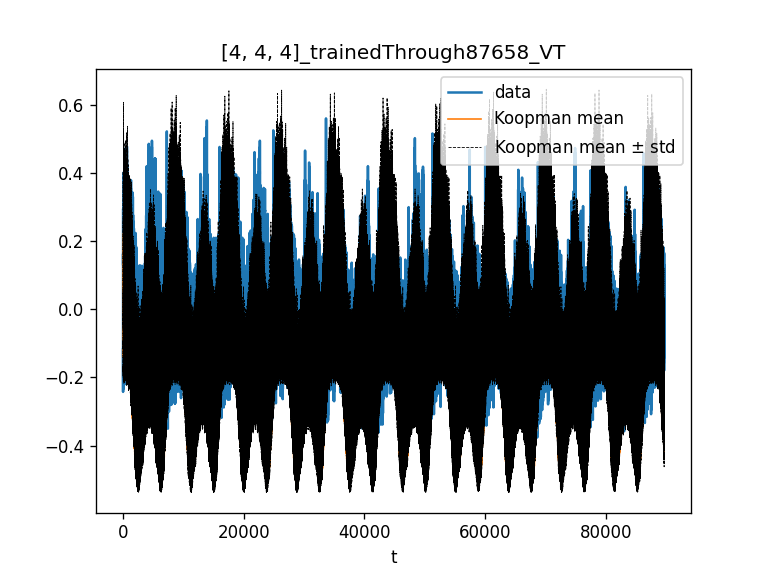

In [28]:
%matplotlib notebook

mean_hat = model.mean(params)
std_hat = model.std(params)
for dim in range(xt.shape[1]):
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
#     plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
#     plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    # plt.plot(mu_vec[slc:], label="real mu")
    # plt.plot(mu_hat[slc:, 0], label="koopman mu")
    # plt.legend()
    # plt.show()
    #
    # plt.plot(sigma_vec[slc:], label="real sigma")
    #     plt.plot(3*sigma_hat[:, dim], label="koopman $3\sigma$", linewidth=0.7)
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

In [13]:
print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

actual overall mean: 0  predicted mean: -0.058417078


In [14]:
"mean of a_hat", np.mean(a_hat)

('mean of a_hat', 0.84480804)

In [15]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [16]:
z_scores = ((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
# z_scores = ((x[train_through:predict_through] - mean_hat[train_through:]) / std_hat[train_through:])[:8760, 0]
# z_scores /= np.std(z_scores)
z_hist, bin_edges = np.histogram(z_scores, bins=40, density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2

In [17]:
print(np.std(z_scores))
np.mean(z_scores)

1.2405120060217483


0.6052616679248631

<IPython.core.display.Javascript object>


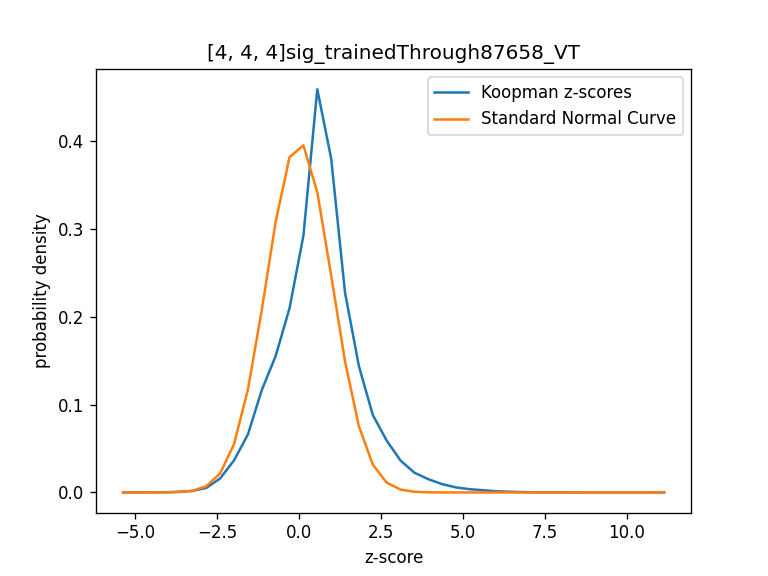

In [18]:
plt.figure()
plt.plot(z_axis, z_hist, label="Koopman z-scores")
plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
plt.title(f"{num_freqs}sig_trainedThrough{train_through}_" + data_name)
plt.xlabel("z-score")
plt.ylabel("probability density")
plt.legend()

In [67]:
mu_hat -= np.mean(mean_hat[:train_through])

# Pinball Loss

In [19]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [20]:
def normal_pinball_loss(data, mus, sigmas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = norm.ppf(q, loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

<IPython.core.display.Javascript object>


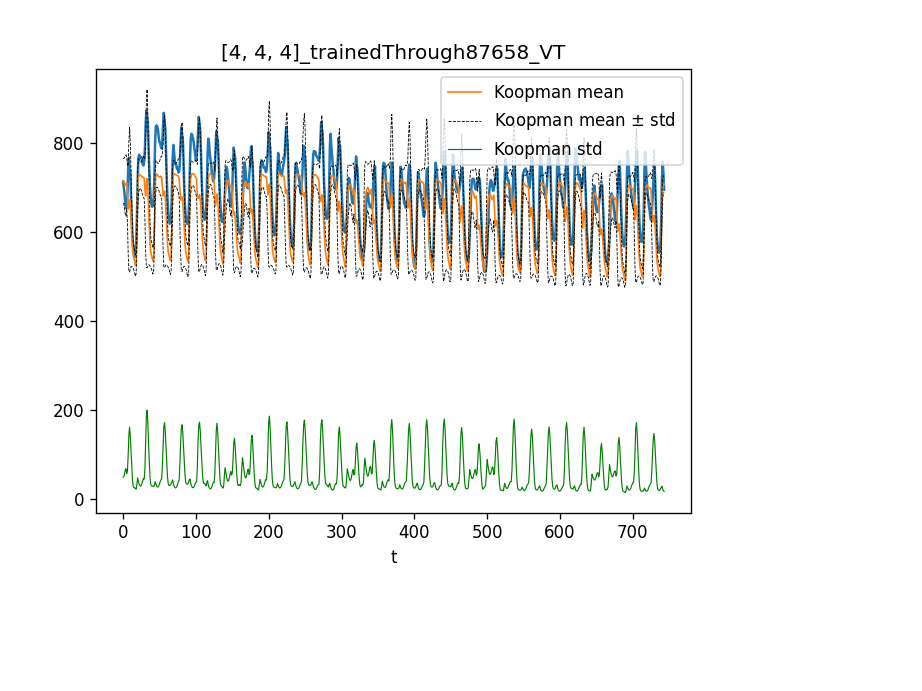

In [21]:
test_start = train_through + delay
# Skew Normal Distribution rescaling
sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
delta = ah / (1 + ah ** 2) ** 0.5
muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
sigh = sigh * rnge
mean_hat = model.mean([muh, sigh, ah])
std_hat = model.std([muh, sigh, ah])

# # Normal Distribution
# sigh = sigma_hat[test_start: predict_through] * rnge
# muh = mu_hat[test_start: predict_through] * rnge + mean
# mean_hat = model.mean([muh, sigh])
# std_hat = model.std([muh, sigh])

plt.figure()
plt.plot(x_original[train_start:][test_start: predict_through])
plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
# plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
plt.xlabel("t")
plt.legend()
plt.show()

In [22]:
loss = normal_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh)
print(loss)

[36.64784102]


In [1]:
import vanilla_benchmark

vanilla_losses = vanilla_benchmark.get_losses(plot=False)
print(vanilla_losses)

ISONE CA
ME
RI
VT
CT
NH
SEMASS
WCMASS
NEMASSBOST
{'ISONE CA': 261.8325734889138, 'ME': 34.36747362743595, 'RI': 18.372431213496, 'VT': 15.691454147924928, 'CT': 84.85058762932823, 'NH': 30.819625160656162, 'SEMASS': 35.950395073427906, 'WCMASS': 41.5295291843028, 'NEMASSBOST': 60.879660947206716}


In [25]:
1 - loss/vanilla_losses[zone_name]

# with 52 day gap between training and testing
# 1 - loss / 84.2  # WCMASS +25%
# 1 - loss / 122.8  # NEMASSBOST 39.4%
# 1 - loss / 596  # ISONE 19.4%
# VT: +9.2%
# (old--Monday=0) {'ISONE CA': 523.7428637110866, 'ME': 58.71157246544602, 'RI': 36.73051071209801, 'VT': 22.977155005752657, 'CT': 141.30040329213762, 'NH': 63.25224646477936, 'SEMASS': 65.42717786334023, 'WCMASS': 70.82418918073226, 'NEMASSBOST': 110.09485925971588}


array([-0.59346956])

In [29]:
import os

folder = ".\\forecasts\GEFComFirstQualTest"
a_hat = np.load(os.path.join(folder, "WCMASStrained-17520-8760_[6, 6, 6]alpha.npy"))
mu_hat = np.load(os.path.join(folder, "WCMASStrained-17520-8760_[6, 6, 6]mu.npy"))
sigma_hat = np.load(os.path.join(folder, "WCMASStrained-17520-8760_[6, 6, 6]sigma.npy"))

In [22]:
a = torch.tensor([0, 1])

In [25]:
a = a[:, None]

In [27]:
torch.repeat_interleave(a, 3, 1)

tensor([[0, 0, 0],
        [1, 1, 1]])

In [26]:
a.shape

torch.Size([2, 1])

In [1]:
import vanilla_benchmark

ModuleNotFoundError: No module named 'vanilla_benchmark'